In [2]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from scipy.misc import imread
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

"""predefine"""

map_img = plt.imread("./floorplan02.png")
max_x = 4.55
min_x = -3.6
max_y = 11.4
min_y = -1.8

"""读取excel文件"""

input_path = "./目标/UncleOfSun_choice_data_all.xlsx"

df = pd.read_excel(open(input_path,'rb'))
df = df.iloc[: , 1:]

In [3]:
df

,time,x,y,label,zone
0,2022-02-21 07:18:00,2.087286,5.072714,54,0
1,2022-02-21 07:19:00,1.241024,7.394367,69,4
2,2022-02-21 07:20:00,1.409763,6.865132,69,0
3,2022-02-21 07:21:00,1.784066,7.879381,78,4
4,2022-02-21 07:22:00,1.850000,7.915000,78,4
...,...,...,...,...,...
11042,2022-03-10 16:26:00,1.790000,-1.800000,6,1
11043,2022-03-10 16:27:00,1.790000,-1.800000,6,1
11044,2022-03-10 16:28:00,1.790000,-1.800000,6,1
11045,2022-03-10 16:29:00,1.276334,2.394604,37,2


In [4]:
list_x = list(df["x"])
list_y = list(df["y"])
list_time = list(df["time"])

In [5]:
print(len(list_y))

11047


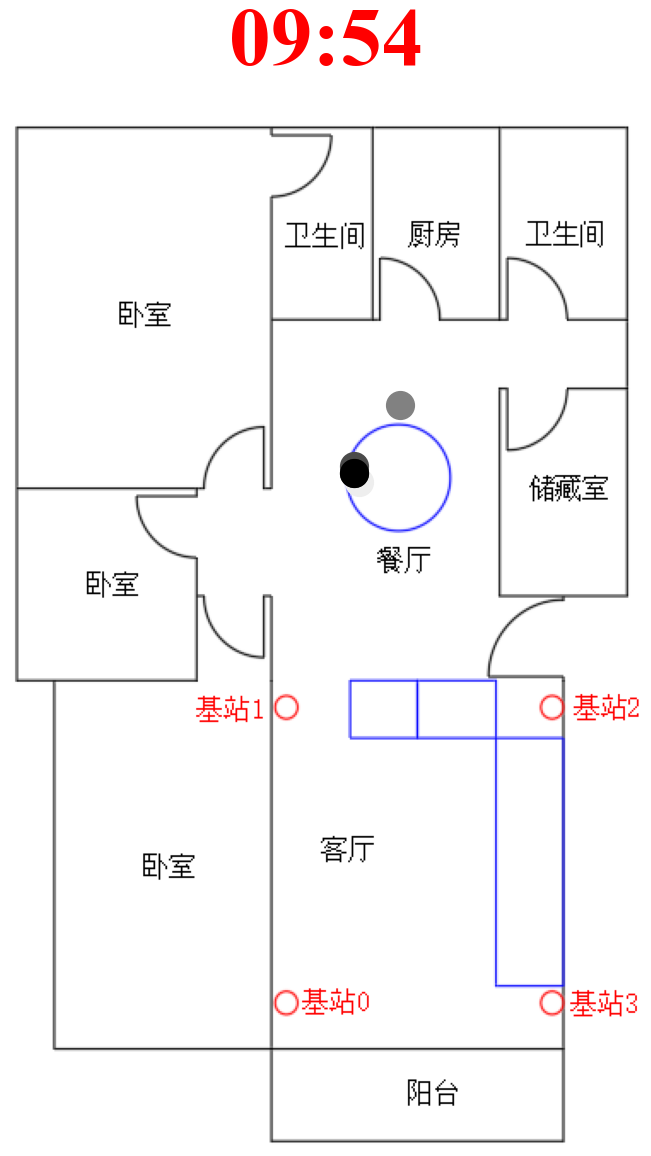

In [7]:
fig,ax = plt.subplots(figsize=(max_x-min_x,max_y-min_y + 2))
def animate(i):
    ax.clear()
    ax.imshow(map_img,extent=[min_x,max_x,min_y,max_y])
    ax.axis("off")
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.text((min_x + max_x)/2,
            max_y + 1,
            str(list_time[i].strftime("%H:%M")),
            fontsize=60,
            fontweight="bold",
            fontstyle="normal",
            alpha=1,
            family = "Times New Roman",
            color="r",
            verticalalignment="center",
            horizontalalignment="center"
                                    )
    i2 = max(0,i-1)
    i3 = max(0,i-2)
    i4 = max(0,i-3)
    i5 = max(0,i-4)
    #line, = ax.plot(list_x[i5:i], list_y[i5:i], color = 'red', lw=5)
    point5, = ax.plot(list_x[i5], list_y[i5], marker='o', markersize = 20, color='#EEEEEE')
    point4, = ax.plot(list_x[i4], list_y[i4], marker='o', markersize = 20, color='#818181')
    point3, = ax.plot(list_x[i3], list_y[i3], marker='o', markersize = 20, color='#4A4A4A')
    point2, = ax.plot(list_x[i2], list_y[i2], marker='o', markersize = 20, color='#242424')
    point1, = ax.plot(list_x[i], list_y[i], marker='o', markersize = 20, color='#000000')
    return  point1,point2,point3,point4,point5,

ani = FuncAnimation(fig, animate, interval=10, blit=True, repeat=True, frames=100)
ani.save("motion.gif", dpi=300, writer=PillowWriter(fps=5))
#ani.save('motion.mp4', writer = 'ffmpeg', fps=30)

plt.show()